<div><img src="logo.png", width=220, ALIGN="left", border=20></div>
<h1>AutoDL Starting Kit </h1>


<br>This code was tested with <br>
Python 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) (https://anaconda.org/)<br>
<br>
</center>
<p>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS".
UNIVERSITE PARIS SUD, INRIA, CHALEARN, AND/OR OTHER ORGANIZERS
OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES.

<br>

# Introduction

* We target applications such as speech, image, video, and text, for which deep learning (DL) methods have had great success recently, to drive the community to work on automating the design of DL models. 
* Raw data will be provided, formatted in a uniform tensor manner, to encourage participants to submit generic algorithms. 
* All problems will be multi-label classification problems. 
* We will impose restrictions on training time and resources to push the state-of-the-art further. We will provide a large number of pre-formatted public datasets and set up a repository of data exchange to enable meta-learning. 

In [10]:
model_dir = 'AutoDL_sample_code_submission/'
result_dir = 'AutoDL_sample_result_submission/' 
problem_dir = 'AutoDL_ingestion_program/'  
score_dir = 'AutoDL_scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import tensorflow as tf
import warnings
from os.path import join
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<div style="background:#cfdfff">
    <h1> Step 1: Load data </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
    <span style="color:red"> Just change the data name in the block below. In the rest of the section, replace the sample plots by anything you want. </span>
</div>

In [6]:
data_dir = 'AutoDL_sample_data'
data_name = 'Monkeys.data'
!ls $data_dir*

mini.data  mini.solution  Monkeys.data	Monkeys.solution


In [7]:
from dataset import AutoDLDataset
D_train = AutoDLDataset(join(data_dir, data_name, "train"))
D_test = AutoDLDataset(join(data_dir, data_name, "test"))

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


<div style="background:#ffcccc"">
    <h1> Step 2: Exploratory data analysis </h1>
</div>

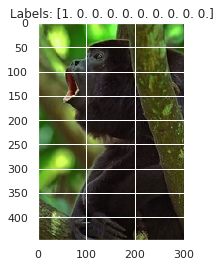

<module 'matplotlib.pyplot' from '/home/adrien/p35/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [8]:
D_train.show_image(2)

<div style="background:#fdfaaa">
    <h1>Step 3: Building a predictive model</h1>
    <p>
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.
    </div>

In [13]:
from model import Model
M = Model(D_train.get_metadata())

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3c8cacc400>, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_evaluation_master': '', '_is_chief': True, '_master': '', '_log_step_count_steps': 100, '_model_dir': '/home/adrien/Documents/autodl/codalab_competition_bundle/AutoDL_starting_kit/AutoDL_sample_code_submission/../checkpoints_Monkeys', '_experimental_distribute': None, '_service': None, '_save_summary_steps': 100, '_eval_distribute': None, '_num_worker_replicas': 1, '_keep_checkpoint_every_n_hours': 10000, '_task_type': 'worker', '_device_fn': None, '_protocol': None, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_train_distribute': None, '_num_ps_replicas': 0, '_tf_random_seed': None}


In [15]:
Y_test = M.test(D_test.get_dataset(), remaining_time_budget=100)

tensor_ts shape: (3, 224, 224)
MODEL INFO: 19-02-26 15:26:39 Begin testing... 
INFO:tensorflow:Could not find trained model in model_dir: /home/adrien/Documents/autodl/codalab_competition_bundle/AutoDL_starting_kit/AutoDL_sample_code_submission/../checkpoints_Monkeys, running initialization to predict.
INFO:tensorflow:Calling model_fn.
(?, 3, 224, 224, 1)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
MODEL INFO: 19-02-26 15:26:41 Asserting predictions have the same number of columns...
MODEL INFO: 19-02-26 15:26:41 [+] Successfully made one prediction. 1.66 sec used. Total time used for testing: 1.66 sec. Current estimated time for test: 1.66e+00 sec.


<div style="background:#bbffbb">
<h1> Step 4: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [21]:
!python run_local_test.py -dataset_dir=$data_dir -code_dir=$model_dir

Traceback (most recent call last):
  File "run_local_test.py", line 20, in <module>
    import tensorflow as tf
ModuleNotFoundError: No module named 'tensorflow'


<div style="background:#cfdfff">
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [22]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = 'sample_code_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
print("Submit these file: " + sample_code_submission)

Submit these file: sample_code_submission_19-02-26-15-29.zip
